In [327]:
# load required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns

In [263]:
# load data from a csv file
file_path = "./data/zomato_df_final_data.csv"
df = pd.read_csv(file_path)

In [264]:
# explore the data
df.head()

,address,cost,cuisine,lat,link,lng,phone,rating_number,rating_text,subzone,title,type,votes,groupon,color,cost_2,cuisine_color
0,"371A Pitt Street, CBD, Sydney",50.0,"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']",-33.876059,https://www.zomato.com/sydney/sydney-madang-cbd,151.207605,02 8318 0406,4.0,Very Good,CBD,Sydney Madang,['Casual Dining'],1311.0,False,#e15307,5.243902,#6f706b
1,"Shop 7A, 2 Huntley Street, Alexandria, Sydney",80.0,"['Cafe', 'Coffee and Tea', 'Salad', 'Poké']",-33.910999,https://www.zomato.com/sydney/the-grounds-of-a...,151.193793,02 9699 2225,4.6,Excellent,"The Grounds of Alexandria, Alexandria",The Grounds of Alexandria Cafe,['Café'],3236.0,False,#9c3203,7.560976,#6f706b
2,"Level G, The Darling at the Star, 80 Pyrmont ...",120.0,['Japanese'],-33.867971,https://www.zomato.com/sydney/sokyo-pyrmont,151.195210,1800 700 700,4.9,Excellent,"The Star, Pyrmont",Sokyo,['Fine Dining'],1227.0,False,#7f2704,10.650407,#6f706b
3,"Sydney Opera House, Bennelong Point, Circular...",270.0,['Modern Australian'],-33.856784,https://www.zomato.com/sydney/bennelong-restau...,151.215297,02 9240 8000,4.9,Excellent,Circular Quay,Bennelong Restaurant,"['Fine Dining', 'Bar']",278.0,False,#7f2704,22.235772,#4186f4
4,"20 Campbell Street, Chinatown, Sydney",55.0,"['Thai', 'Salad']",-33.879035,https://www.zomato.com/sydney/chat-thai-chinatown,151.206409,02 8317 4811,4.5,Excellent,Chinatown,Chat Thai,['Casual Dining'],2150.0,False,#a83703,5.630081,#6f706b


In [265]:
# view the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        10500 non-null  object 
 1   cost           10154 non-null  float64
 2   cuisine        10500 non-null  object 
 3   lat            10308 non-null  float64
 4   link           10500 non-null  object 
 5   lng            10308 non-null  float64
 6   phone          10500 non-null  object 
 7   rating_number  7184 non-null   float64
 8   rating_text    7184 non-null   object 
 9   subzone        10500 non-null  object 
 10  title          10500 non-null  object 
 11  type           10452 non-null  object 
 12  votes          7184 non-null   float64
 13  groupon        10500 non-null  bool   
 14  color          10500 non-null  object 
 15  cost_2         10154 non-null  float64
 16  cuisine_color  10500 non-null  object 
dtypes: bool(1), float64(6), object(10)
memory usage: 1

In [266]:
# no of numerical columns
numerical_columns = ["cost", "lat", "lng", "rating_number", "votes", "cost_2"]

# no of categorical columns
categorical_columns = [
    "address",
    "cuisine",
    "link",
    "phone",
    "rating_text",
    "subzone",
    "title",
    "type",
    "groupon",
    "color",
    "cuisine_color",
]

## Cleaning and Preprocessing the dataset


In [267]:
# check the shape of the data
df.shape

(10500, 17)

In [268]:
# checking for duplicate records
df.duplicated().sum()

# fetch the duplicate records from the dataset
# get the original records
df[df.duplicated(keep=False)]

# drop the duplicate record
df_cleaned = df.drop_duplicates()

In [269]:
# check the columns with missing values
df_cleaned.isnull().sum()

address             0
cost              346
cuisine             0
lat               192
link                0
lng               192
phone               0
rating_number    3316
rating_text      3316
subzone             0
title               0
type               48
votes            3316
groupon             0
color               0
cost_2            346
cuisine_color       0
dtype: int64

In [270]:
# Convert string representation of lists to actual lists
df_cleaned.loc[:, "cuisine"] = df_cleaned["cuisine"].apply(ast.literal_eval)

# Convert string representation of lists to actual lists, for the type column, ignore the error
# replace nan with empty list
df_cleaned.loc[:, "type"] = df_cleaned["type"].fillna("[]")
df_cleaned.loc[:, "type"] = df_cleaned["type"].apply(ast.literal_eval)

In [271]:
df_cleaned["cuisine"].head()

0     [Hot Pot, Korean BBQ, BBQ, Korean]
1    [Cafe, Coffee and Tea, Salad, Poké]
2                             [Japanese]
3                    [Modern Australian]
4                          [Thai, Salad]
Name: cuisine, dtype: object

In [272]:
df_cleaned["type"].head()

0       [Casual Dining]
1                [Café]
2         [Fine Dining]
3    [Fine Dining, Bar]
4       [Casual Dining]
Name: type, dtype: object

## Exploratory Data Analysis

### Distribution of numerical variables


<Axes: title={'center': 'Distribution of the cost column'}>

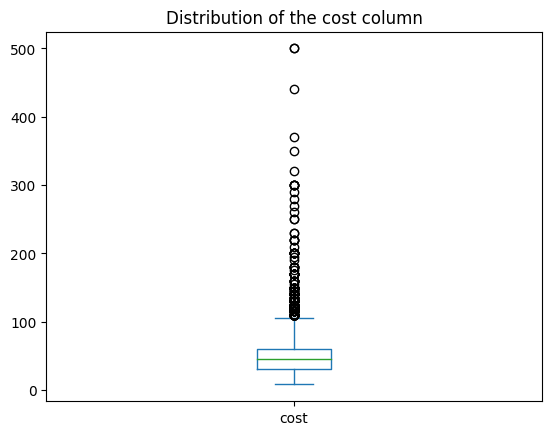

In [317]:
# plot the distribution of the cost column as a box plot
# add a title to the plot
plt.title("Distribution of the cost column")
df_cleaned["cost"].plot(kind="box")

<Axes: xlabel='cost', ylabel='Count'>

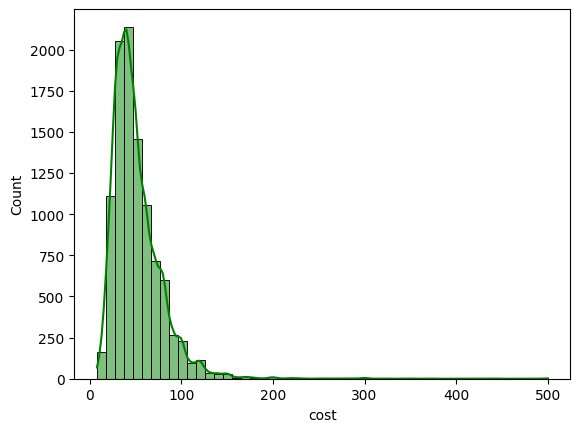

In [332]:
# plot the distribution of the cost column as a histogram
# add a title to the plot

sns.histplot(df_cleaned["cost"], bins=50, kde=True, color="green")

#### **Insights and observations**

_Presence of Outliers_: The box plot shows a significant number of outliers with values far beyond the upper whisker, extending up to nearly 500, indicating that there are some restaurants with unusually high costs.

_Skewed Distribution_: The histogram shows that the "cost" distribution is right-skewed, with most of the data concentrated between 0 and 100, while higher costs occur less frequently.

_Central Tendency_: The median and interquartile range in the box plot suggest that the majority of restaurants fall within a relatively low cost range, roughly between 0 and 100.

_Heavy Tail_: The tail of the histogram suggests that there are a few extreme cases with very high costs, though they are relatively rare compared to the lower cost range.


### How many unique cuisines are served by Sydeney Restaurants ?


In [273]:
# let's check frequency distribution of the categorical columns
# let's aggregate the cusines column, i.e merge all lists in cusines column into one list
cuisine_list = []
for cuisine in df_cleaned["cuisine"]:
    cuisine_list.extend(cuisine)

# convert the list to a pandas series
cuisine_series = pd.Series(cuisine_list)

# view the data
cuisine_series.head()

# get unique values
cuisine_series.unique()

# get count of each unique value
cuisine_series.value_counts()

# select cuisine with count greater than 100
cuisine_series.value_counts()[cuisine_series.value_counts() < 10]

# no. of cusiines with count greater than 100
cuisine_series.value_counts()[cuisine_series.value_counts() < 50].shape

# list of cusines with count greater than 100
cuisine_list = cuisine_series.value_counts()[
    cuisine_series.value_counts() < 50
].index.tolist()

In [274]:
# total no. of unique values
cuisine_series.nunique()

134

In [275]:
# let's plot the top 15 cuisines
top_15_cuisines = cuisine_series.value_counts().head(25)
top_15_cuisines

Cafe                 3162
Modern Australian     981
Chinese               863
Italian               820
Pizza                 744
Thai                  703
Japanese              578
Asian                 536
Burger                505
Indian                402
Seafood               388
Vietnamese            361
Sushi                 335
Pub Food              332
Bar Food              330
Sandwich              320
Coffee and Tea        289
Australian            269
Bakery                234
Healthy Food          216
Fast Food             208
Desserts              206
Vegetarian            188
Korean                181
Mediterranean         147
Name: count, dtype: int64

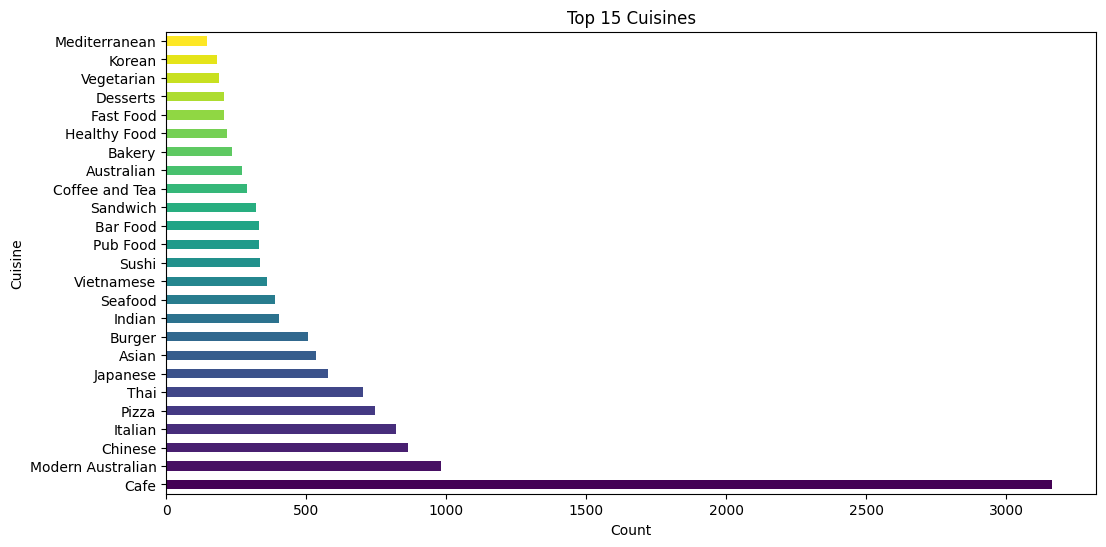

In [276]:
# let's plot the top 15 cuisines as horizontal bar chart

plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(top_15_cuisines)))
top_15_cuisines.plot(kind="barh", color=colors)
plt.title("Top 15 Cuisines")
plt.xlabel("Count")
plt.ylabel("Cuisine")
plt.show()

**Observations**

- A total of 134 unique cuisines are served by Sydney Restaurants.

- Modern Australian Cuisine is the most common cuisine, followed by Chinese and Italian cuisines.


### Which Suburb has the highest number of restaurants ?


In [277]:
# let's check the unique subzones
df_cleaned["subzone"].nunique()

572

In [278]:
# let's check the frequency distribution of subzones
df_cleaned["subzone"].value_counts()

subzone
CBD                                         476
Surry Hills                                 260
Parramatta                                  225
Darlinghurst                                188
Chinatown                                   174
                                           ... 
The Sydney Boulevard Hotel, Darlinghurst      1
Pullman Quay Grand Sydney Harbour, CBD        1
Chullora                                      1
Marriott Sydney Harbour, Circular Quay        1
Holiday Inn Old Sydney, The Rocks             1
Name: count, Length: 572, dtype: int64

In [279]:
# top 10 subzones with highest no. of restaurants
top_10_subzones = df_cleaned["subzone"].value_counts().head(10)
top_10_subzones

subzone
CBD             476
Surry Hills     260
Parramatta      225
Darlinghurst    188
Chinatown       174
Newtown         160
Blacktown       123
Potts Point     120
Manly           117
Bondi Beach     113
Name: count, dtype: int64

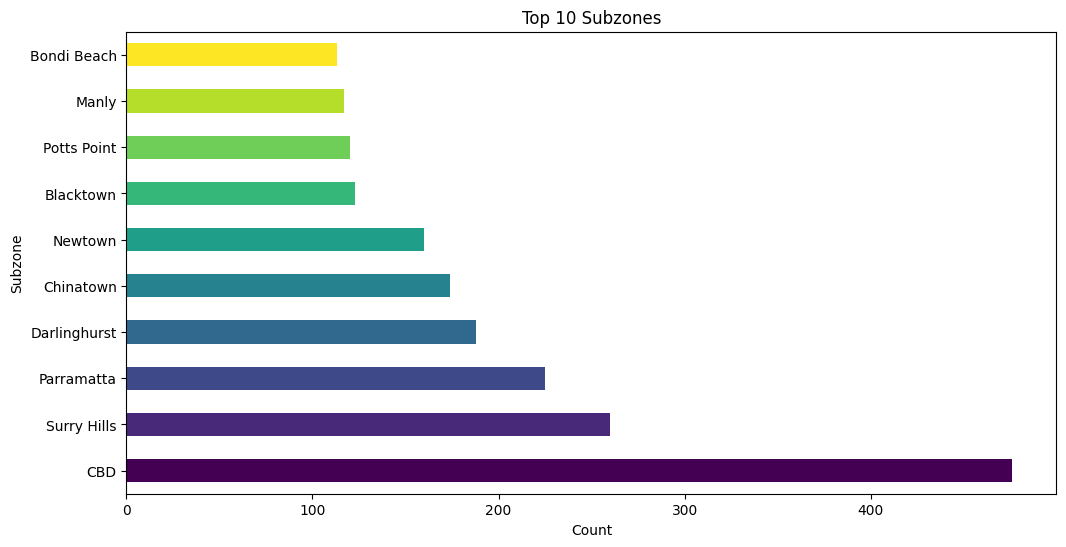

In [280]:
# let's plot the top 10 subzones
plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_subzones)))
top_10_subzones.plot(kind="barh", color=colors)
plt.title("Top 10 Subzones")
plt.xlabel("Count")
plt.ylabel("Subzone")
plt.show()

**Observations**

- **CBD** has the highest no of restaurants in sydney, followed by **Surry Hills** and **Parramatta**


### Is there a relationship between the cost and rating of the restaurant ?


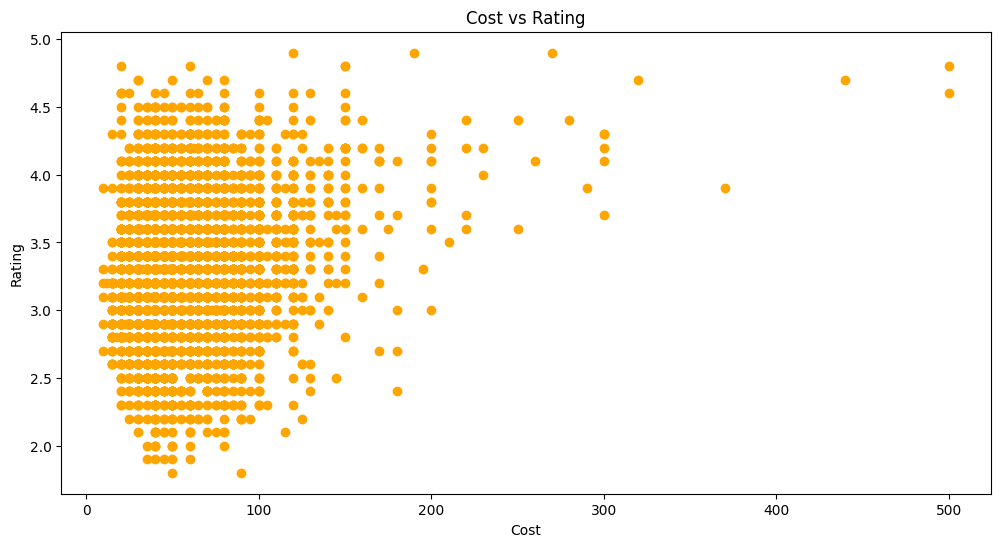

In [281]:
# Scatter plot of cost vs rating
plt.figure(figsize=(12, 6))
plt.scatter(df_cleaned["cost"], df_cleaned["rating_number"], color="orange")
plt.title("Cost vs Rating")
plt.xlabel("Cost")
plt.ylabel("Rating")
plt.show()

**Observations**

- There's no strong positive correlation between cost and rating. Higher cost doesn’t necessarily mean better ratings. Some high-cost items have relatively low ratings, and some low-cost items have high ratings.


### What are the different types of Restaurants in Sydney ? What type of restaurants are more common ?


In [282]:
# let's aggregate the type column, i.e merge all lists in type column into one list
type_list = []
for type in df_cleaned["type"]:
    type_list.extend(type)

# convert the list to a pandas series
type_series = pd.Series(type_list)

# view the data
type_series.head()

0    Casual Dining
1             Café
2      Fine Dining
3      Fine Dining
4              Bar
dtype: object

In [283]:
# get the unique values
type_series.unique()

array(['Casual Dining', 'Café', 'Fine Dining', 'Bar', 'Dessert Parlour',
       'Wine Bar', 'Fast Food', 'Bakery', 'Food Court', 'Pub',
       'Food Truck', 'Club', 'Beverage Shop', 'Food Stall'], dtype=object)

In [284]:
# total no. of unique values
type_series.nunique()

14

In [285]:
# get count of each unique value
type_series.value_counts()

Casual Dining      5566
Café               3169
Bar                 692
Fast Food           587
Food Court          543
Pub                 382
Bakery              174
Fine Dining         113
Wine Bar            106
Dessert Parlour      67
Beverage Shop        17
Food Truck           16
Club                 12
Food Stall            2
Name: count, dtype: int64

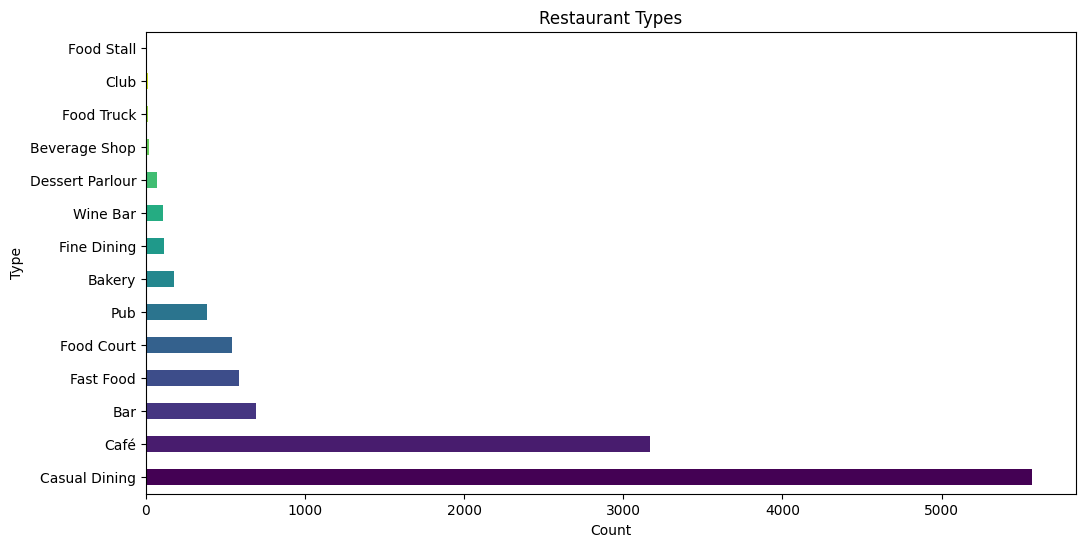

In [286]:
# let's plot the restaurant types
plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(type_series.value_counts())))
type_series.value_counts().plot(kind="barh", color=colors)
plt.title("Restaurant Types")
plt.xlabel("Count")
plt.ylabel("Type")
plt.show()

**Observations:**

- **Casual Dining** Restaurants are most common in Sydney, followed by **Café** and **Bar**
- There are a total of 14 different resturant types operating in Sydney


### Rating versus Cost

Let's explore the dataset to check whethere the restaurant rating has any impact on cost.


<Figure size 1200x600 with 0 Axes>

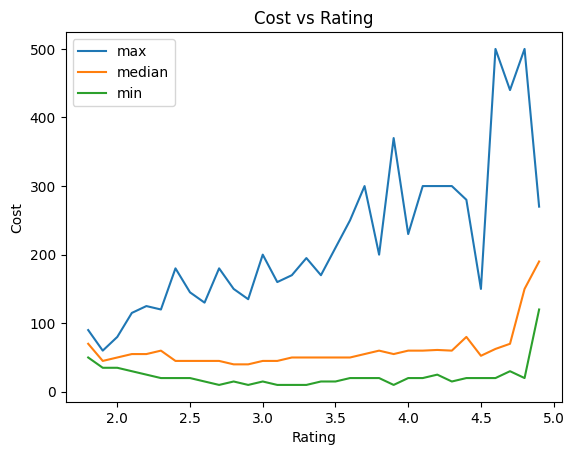

In [287]:
# plot the maximum, mean and minimum cost of reatuirants with respect to the rating

# group by rating and get the maximum, median and minimum cost
cost_rating = df_cleaned.groupby("rating_number")["cost"].agg(["max", "median", "min"])

# plot the data
plt.figure(figsize=(12, 6))
cost_rating.plot(kind="line")
plt.title("Cost vs Rating")
plt.xlabel("Rating")
plt.ylabel("Cost")
plt.show()

<Figure size 1200x600 with 0 Axes>

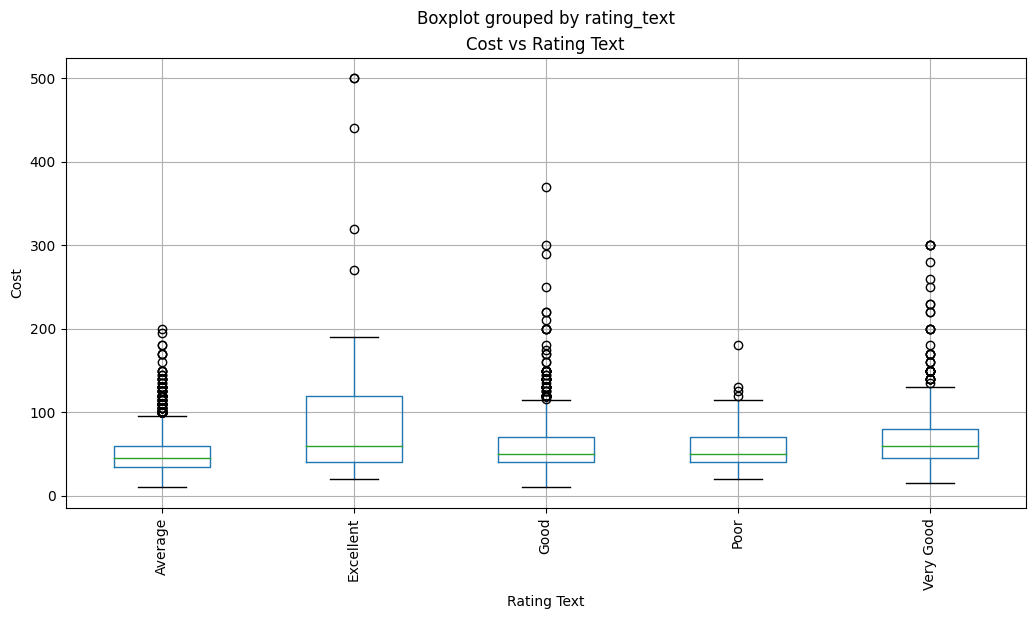

In [288]:
# create a box plot of rating_text vs cost

plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(df_cleaned["rating_text"].unique())))
df_cleaned.boxplot(column="cost", by="rating_text", rot=90, figsize=(12, 6))
plt.title("Cost vs Rating Text")
plt.xlabel("Rating Text")
plt.ylabel("Cost")
plt.show()

**Observations:**

- Higher-rated products/services tend to have a much wider range of costs, with "Excellent" ratings being the most variable and expensive.
- The median cost doesn't increase dramatically with higher ratings, but the maximum cost does, indicating that while many highly rated options are reasonably priced, there are also luxury or premium-priced outliers.
- More average-rated services/products are less costly and more consistent in terms of pricing.


# Density Map


In [289]:
import geopandas as gpd

# url to geojson file
file_path = "./data/sydney.geojson"

# load the geojson file
gdf_locations = gpd.read_file(file_path, crs="EPSG:4326")

In [290]:
# view the data
gdf_locations.head()

,SSC_CODE,SSC_NAME,CONF_VALUE,SQKM,geometry
0,10001,Abbotsbury,Very good,4.984673,"POLYGON ((150.85118 -33.87069, 150.85104 -33.8..."
1,10002,Abbotsford (NSW),Very good,1.017855,"POLYGON ((151.12593 -33.84578, 151.12678 -33.8..."
2,10010,Acacia Gardens,Very good,0.946630,"POLYGON ((150.90781 -33.73547, 150.90799 -33.7..."
3,10016,Airds,Very good,2.380773,"POLYGON ((150.84000 -34.07817, 150.84077 -34.0..."
4,10022,Alexandria,Very good,3.503330,"POLYGON ((151.18603 -33.91660, 151.18562 -33.9..."


c:\ProgramData\anaconda3\Lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<Axes: >

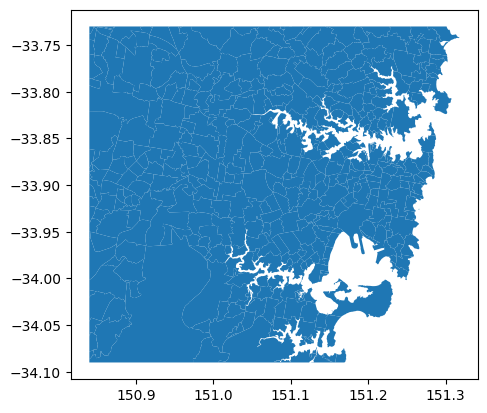

In [291]:
# plot the gdf  data
gdf_locations.plot()

In [292]:
# create geodataframe from the dataframe [2]
gdf_restaurants = gpd.GeoDataFrame(
    df_cleaned,
    geometry=gpd.points_from_xy(df_cleaned.lng, df_cleaned.lat),
    crs="EPSG:4326",
)

In [293]:
gdf_restaurants.info()

# check null values
gdf_restaurants.isnull().sum()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 10499 entries, 0 to 10499
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   address        10499 non-null  object  
 1   cost           10153 non-null  float64 
 2   cuisine        10499 non-null  object  
 3   lat            10307 non-null  float64 
 4   link           10499 non-null  object  
 5   lng            10307 non-null  float64 
 6   phone          10499 non-null  object  
 7   rating_number  7183 non-null   float64 
 8   rating_text    7183 non-null   object  
 9   subzone        10499 non-null  object  
 10  title          10499 non-null  object  
 11  type           10499 non-null  object  
 12  votes          7183 non-null   float64 
 13  groupon        10499 non-null  bool    
 14  color          10499 non-null  object  
 15  cost_2         10153 non-null  float64 
 16  cuisine_color  10499 non-null  object  
 17  geometry       10499 non-nul

address             0
cost              346
cuisine             0
lat               192
link                0
lng               192
phone               0
rating_number    3316
rating_text      3316
subzone             0
title               0
type                0
votes            3316
groupon             0
color               0
cost_2            346
cuisine_color       0
geometry            0
dtype: int64

no null values in geometry column


In [294]:
gdf_locations.info()

# null values in the gdf_restaurants
gdf_locations.isnull().sum()

# remove the null values in the gdf_locations geometry column
gdf_locations = gdf_locations.dropna(subset=["geometry"])

# null values in the gdf_restaurants
gdf_locations.isnull().sum()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   SSC_CODE    494 non-null    object  
 1   SSC_NAME    494 non-null    object  
 2   CONF_VALUE  494 non-null    object  
 3   SQKM        476 non-null    float64 
 4   geometry    471 non-null    geometry
dtypes: float64(1), geometry(1), object(3)
memory usage: 19.4+ KB


SSC_CODE      0
SSC_NAME      0
CONF_VALUE    0
SQKM          0
geometry      0
dtype: int64

In [295]:
# spatial join the two geodataframes
restaurant_locations_gdf = gpd.sjoin(
    gdf_restaurants, gdf_locations, how="right", op="within"
)

c:\ProgramData\anaconda3\Lib\site-packages\shapely\measurement.py:103: RuntimeWarning: invalid value encountered in bounds
  return lib.bounds(geometry_arr, out=out, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\shapely\predicates.py:526: RuntimeWarning: invalid value encountered in contains
  return lib.contains(a, b, **kwargs)


In [299]:
# restaurant_locations_gdf.info()

# check the null values
restaurant_locations_gdf.isnull().sum()

# remove records where there are missing values in the cuisine column
restaurant_locations_gdf = restaurant_locations_gdf.dropna(subset=["cuisine"])

# check the null values
restaurant_locations_gdf.isnull().sum()

index_left          0
address             0
cost              295
cuisine             0
lat                 0
link                0
lng                 0
phone               0
rating_number    2776
rating_text      2776
subzone             0
title               0
type                0
votes            2776
groupon             0
color               0
cost_2            295
cuisine_color       0
SSC_CODE            0
SSC_NAME            0
CONF_VALUE          0
SQKM                0
geometry            0
dtype: int64

In [304]:
# check if the values in cuisine column is of type list
restaurant_locations_gdf.head()

# create new columns called indian_cuisine, chinese_cuisine, italian_cuisine and modern_australian_cuisine
# set the values to 0 by default and set the value to 1 if the cuisine is present in the cuisine column
restaurant_locations_gdf["indian_cuisine"] = 0
restaurant_locations_gdf["chinese_cuisine"] = 0
restaurant_locations_gdf["italian_cuisine"] = 0
restaurant_locations_gdf["modern_australian_cuisine"] = 0

# set the values to 1 if the cuisine is present in the cuisine column
restaurant_locations_gdf.loc[
    restaurant_locations_gdf["cuisine"].apply(lambda x: "Indian" in x), "indian_cuisine"
] = 1
restaurant_locations_gdf.loc[
    restaurant_locations_gdf["cuisine"].apply(lambda x: "Chinese" in x),
    "chinese_cuisine",
] = 1
restaurant_locations_gdf.loc[
    restaurant_locations_gdf["cuisine"].apply(lambda x: "Italian" in x),
    "italian_cuisine",
] = 1
restaurant_locations_gdf.loc[
    restaurant_locations_gdf["cuisine"].apply(lambda x: "Modern Australian" in x),
    "modern_australian_cuisine",
] = 1

# check the data
restaurant_locations_gdf.head()

,index_left,address,cost,cuisine,lat,link,lng,phone,rating_number,rating_text,...,cuisine_color,SSC_CODE,SSC_NAME,CONF_VALUE,SQKM,geometry,indian_cuisine,chinese_cuisine,italian_cuisine,modern_australian_cuisine
0,2697.0,"745-899 Elizabeth Drive, Bonnyrigg, Sydney",130.0,"[Italian, Pizza, Tapas]",-33.881260,https://www.zomato.com/sydney/amorettis-bonnyrigg,150.859422,02 8786 1777,3.3,Average,...,#6f706b,10001,Abbotsbury,Very good,4.984673,"POLYGON ((150.85118 -33.87069, 150.85104 -33.8...",0,0,1,0
0,6411.0,"Shop 4, 60-68 Stockdale Crescent, Abbotsbury,...",78.0,"[Italian, Pizza]",-33.869781,https://www.zomato.com/sydney/8-slices-pizzari...,150.865070,(02) 9610 9910,3.0,Average,...,#6f706b,10001,Abbotsbury,Very good,4.984673,"POLYGON ((150.85118 -33.87069, 150.85104 -33.8...",0,0,1,0
1,7143.0,"547 Great North Road, Abbotsford, Sydney",45.0,"[Pizza, Italian]",-33.848228,https://www.zomato.com/sydney/charleys-pizzeri...,151.128233,02 9712 2111,NaN,NaN,...,#6f706b,10002,Abbotsford (NSW),Very good,1.017855,"POLYGON ((151.12593 -33.84578, 151.12678 -33.8...",0,0,1,0
1,3099.0,"378 Great North Road, Abbotsford, Sydney",70.0,"[Latin American, Fusion]",-33.850952,https://www.zomato.com/sydney/the-cove-dining-...,151.129112,02 9713 7896,3.3,Average,...,#6f706b,10002,Abbotsford (NSW),Very good,1.017855,"POLYGON ((151.12593 -33.84578, 151.12678 -33.8...",0,0,0,0
1,5197.0,"559 Great North Road, Abbotsford, Sydney",70.0,[Korean],-33.847719,https://www.zomato.com/sydney/sog-abbotsford,151.128009,02 8958 2588,3.0,Average,...,#6f706b,10002,Abbotsford (NSW),Very good,1.017855,"POLYGON ((151.12593 -33.84578, 151.12678 -33.8...",0,0,0,0


In [309]:
# create a new dataframe with density of each cuisine in each SSA_NAME, SSA_CODE, geometry
cuisine_density = restaurant_locations_gdf.groupby(["SSC_NAME", "SSC_CODE"])[
    [
        "indian_cuisine",
        "chinese_cuisine",
        "italian_cuisine",
        "modern_australian_cuisine",
    ]
].sum()

# check the data
cuisine_density.head()

# merge the cuisine_density with gdf_locations to obtain the geometry
cuisine_density = gdf_locations.merge(
    cuisine_density, left_on="SSC_CODE", right_on="SSC_CODE"
)

# check the data
cuisine_density.head()

,SSC_CODE,SSC_NAME,CONF_VALUE,SQKM,geometry,indian_cuisine,chinese_cuisine,italian_cuisine,modern_australian_cuisine
0,10001,Abbotsbury,Very good,4.984673,"POLYGON ((150.85118 -33.87069, 150.85104 -33.8...",0,0,2,0
1,10002,Abbotsford (NSW),Very good,1.017855,"POLYGON ((151.12593 -33.84578, 151.12678 -33.8...",0,0,1,1
2,10022,Alexandria,Very good,3.503330,"POLYGON ((151.18603 -33.91660, 151.18562 -33.9...",0,1,3,6
3,10025,Allambie Heights,Very good,6.708513,"POLYGON ((151.25097 -33.75696, 151.25096 -33.7...",1,0,2,0
4,10027,Allawah,Very good,0.624729,"POLYGON ((151.10876 -33.97265, 151.10874 -33.9...",1,0,1,0


c:\ProgramData\anaconda3\Lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\ProgramData\anaconda3\Lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\ProgramData\anaconda3\Lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\ProgramData\anaconda3\Lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is depr

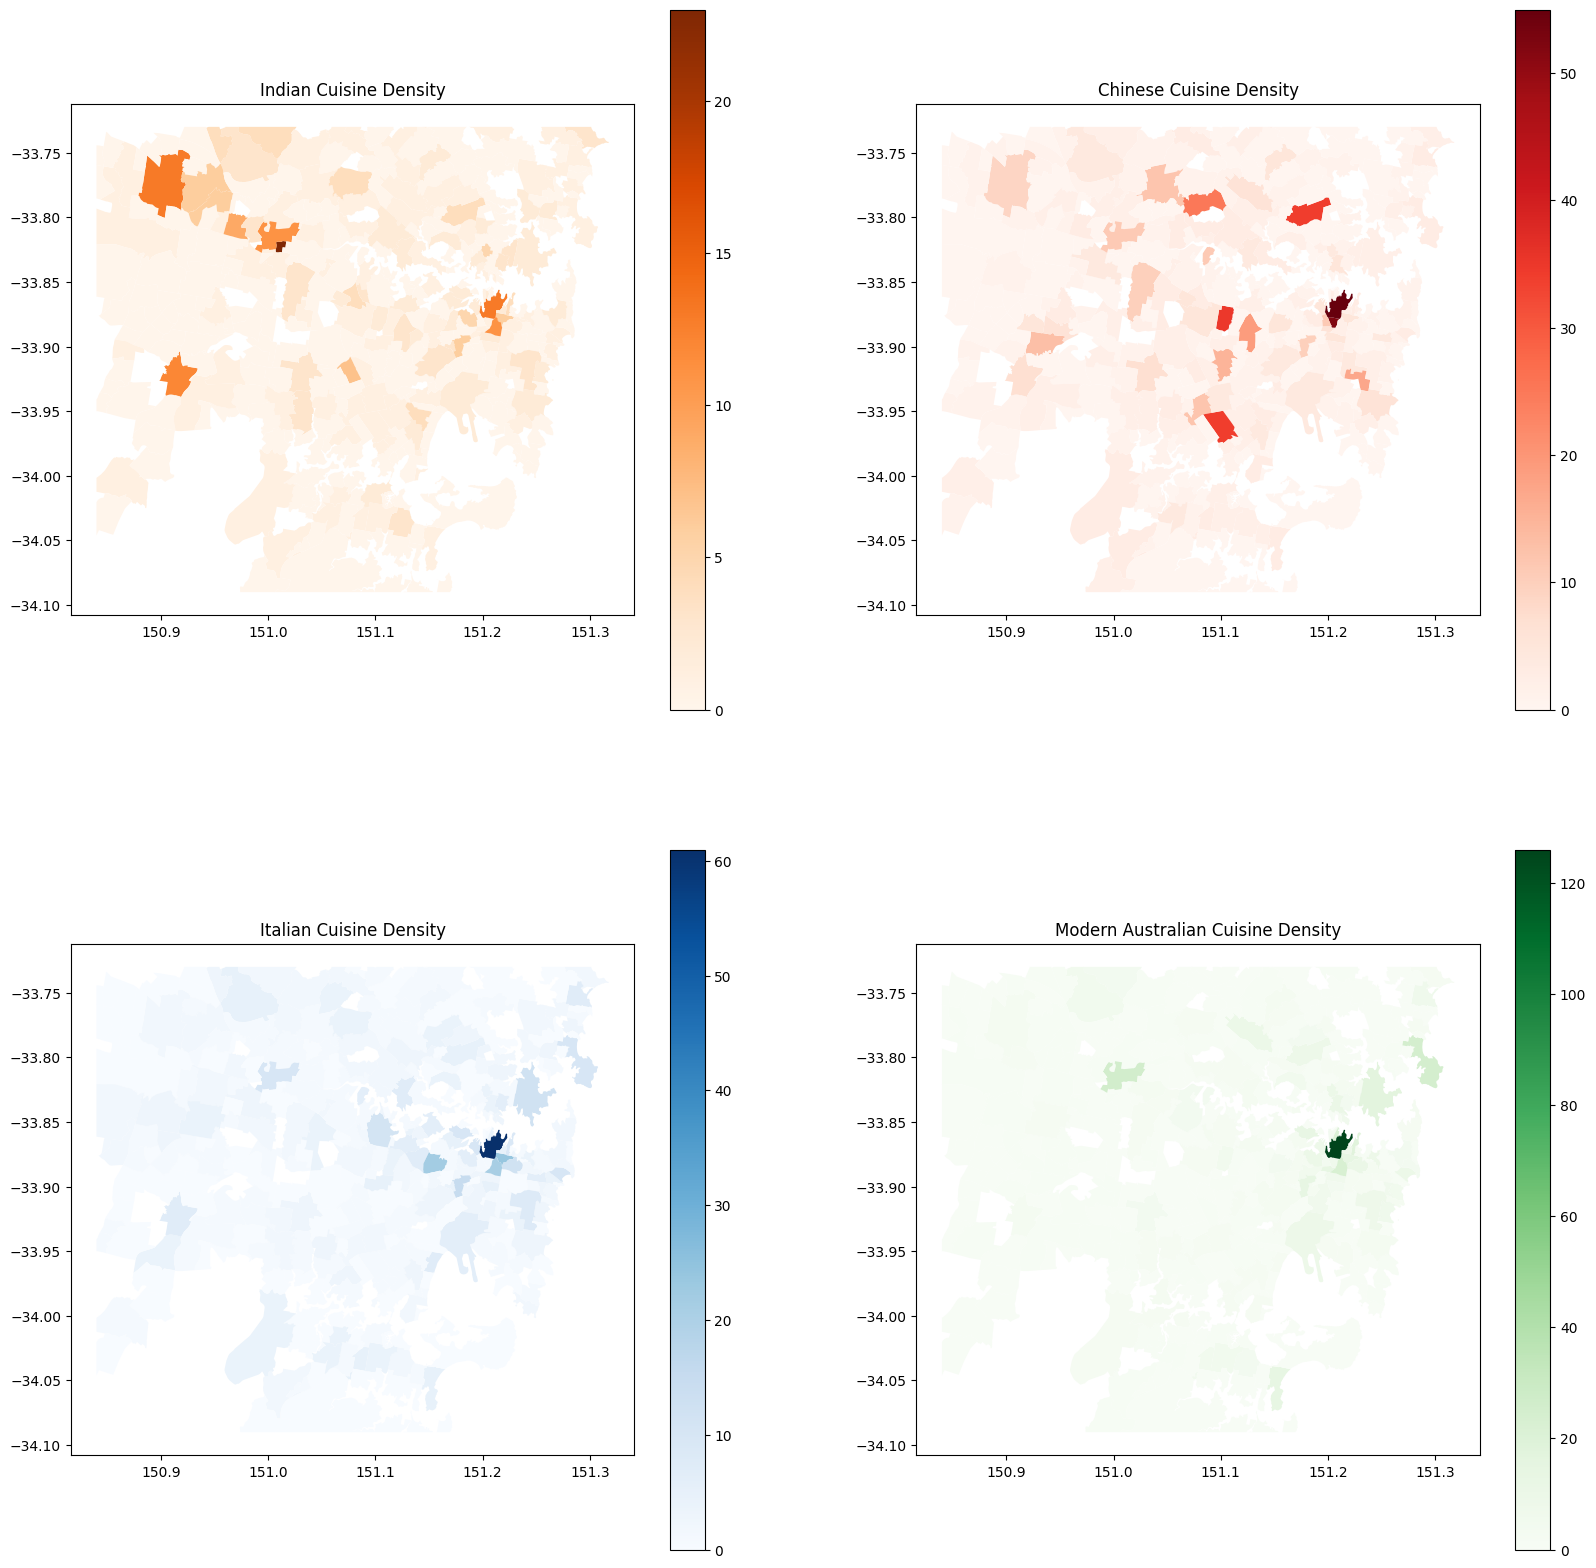

In [311]:
# seperatly plots the density of each cuisine in the map
fig, ax = plt.subplots(2, 2, figsize=(20, 20))
cuisine_density.plot(column="indian_cuisine", ax=ax[0, 0], legend=True, cmap="Oranges")
ax[0, 0].set_title("Indian Cuisine Density")
cuisine_density.plot(column="chinese_cuisine", ax=ax[0, 1], legend=True, cmap="Reds")
ax[0, 1].set_title("Chinese Cuisine Density")
cuisine_density.plot(column="italian_cuisine", ax=ax[1, 0], legend=True, cmap="Blues")
ax[1, 0].set_title("Italian Cuisine Density")
cuisine_density.plot(
    column="modern_australian_cuisine", ax=ax[1, 1], legend=True, cmap="Greens"
)
ax[1, 1].set_title("Modern Australian Cuisine Density")
plt.show()

# Intercative Plots using plotly

I will use plotly to plot the cost vs rating.


In [312]:
import plotly.graph_objs as go
import plotly.express as px


df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10499 entries, 0 to 10499
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        10499 non-null  object 
 1   cost           10153 non-null  float64
 2   cuisine        10499 non-null  object 
 3   lat            10307 non-null  float64
 4   link           10499 non-null  object 
 5   lng            10307 non-null  float64
 6   phone          10499 non-null  object 
 7   rating_number  7183 non-null   float64
 8   rating_text    7183 non-null   object 
 9   subzone        10499 non-null  object 
 10  title          10499 non-null  object 
 11  type           10499 non-null  object 
 12  votes          7183 non-null   float64
 13  groupon        10499 non-null  bool   
 14  color          10499 non-null  object 
 15  cost_2         10153 non-null  float64
 16  cuisine_color  10499 non-null  object 
dtypes: bool(1), float64(6), object(10)
memory usage: 1.4+ M

In [314]:
# plot the maximum, mean and minimum cost of reatuirants with respect to the rating
cost_rating = df_cleaned.groupby("rating_number")["cost"].agg(["max", "median", "min"])

# plot the data in smaaller figsize
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=cost_rating.index, y=cost_rating["max"], mode="lines", name="Max")
)
fig.add_trace(
    go.Scatter(
        x=cost_rating.index, y=cost_rating["median"], mode="lines", name="Median"
    )
)
fig.add_trace(
    go.Scatter(x=cost_rating.index, y=cost_rating["min"], mode="lines", name="Min")
)
fig.update_layout(title="Cost vs Rating", xaxis_title="Rating", yaxis_title="Cost")
fig.show()

### Limitations of Non-Interactive Plotting (like Matplotlib):

1. **Static Nature**: Non-interactive plots, like those created using Matplotlib, are static images. They lack the ability to provide additional context or details when users explore the data (e.g., hovering over data points to see exact values).
2. **Fixed Views**: Users are unable to zoom in or out or pan around different sections of the plot to focus on specific areas of interest.
3. **Lack of Interactivity**: Features such as tooltips, dynamic legends, or interactive selections (e.g., toggling lines on or off) are not available, which can limit the ability to customize and interact with the data on the fly.
4. **Limited Scalability**: When dealing with large datasets or plots with many elements, static plots can become cluttered and difficult to interpret.

### Advantages of Interactive Plotting Libraries (like Plotly):

1. **Hover Tooltips**: As seen in the interactive Plotly version of your graph, users can hover over specific points to see exact values, such as the maximum, median, or minimum costs at a given rating. This provides more immediate context without cluttering the plot.
2. **Zooming and Panning**: Interactive libraries allow users to zoom into specific ranges or areas of interest. For example, if someone is interested in only exploring ratings between 3 and 4, they can zoom into that region without regenerating the plot.
3. **Legend Interaction**: With Plotly, users can toggle individual lines (e.g., turning off the maximum or minimum line) to focus on specific data. This level of control makes the plot more customizable.
4. **Real-Time Updates**: In cases where the data is being updated in real-time (e.g., live dashboards), interactive libraries can handle dynamic data updates, making them useful for live monitoring or decision-making scenarios.
5. **Exportability**: Many interactive libraries like Plotly allow users to download the graph in different formats directly from the interface, facilitating data sharing and presentations.

### Use Case Where Interactive Plotting Solves Limitations:

Imagine you are building a dashboard for a restaurant chain to analyze restaurant ratings versus costs across multiple regions. With a static plot:

- Users cannot explore variations at different rating levels dynamically.
- They might need multiple separate plots or views to compare cost metrics.

However, an **interactive plot** using Plotly or another library would allow stakeholders to:

- **Zoom into specific regions**: For example, zooming into ratings between 4.0 and 5.0 to focus on higher-rated restaurants.
- **Toggle data visibility**: Users can focus on only maximum, median, or minimum costs at different times.
- **Hover for precise data**: Exact cost values can be shown when hovered, which is crucial when interpreting detailed metrics.
- **Embed in dashboards**: These plots can be embedded into dashboards, giving stakeholders real-time interaction with their data without needing to re-run or export multiple graphs.

In conclusion, while non-interactive libraries like Matplotlib are useful for static reports, **interactive libraries** like Plotly offer far more flexibility, user engagement, and ease of exploration, especially when dealing with complex datasets or real-time data.


References:

[1] https://stackoverflow.com/questions/1894269/how-to-convert-string-representation-of-list-to-a-list
[2] https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html
